In [1]:
options(jupyter.rich_display=FALSE) # Create output as usual in R

In [2]:
library(sf)

Linking to GEOS 3.7.1, GDAL 2.4.0, PROJ 5.2.0



In [3]:
load("south-america-1990.RData")
load("ged191.RData")

In [4]:
# This fails due to different coordinate reference systems
Colombia.conflicts <- ged191[Colombia,]

ERROR: Error in st_geos_binop("intersects", x, y, sparse = sparse, prepared = prepared): st_crs(x) == st_crs(y) is not TRUE


In [5]:
st_crs(Colombia)

Coordinate Reference System:
  User input: +proj=longlat +ellps=WGS84 
  wkt:
GEOGCS["WGS 84",
    DATUM["unknown",
        SPHEROID["WGS84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433]]

In [6]:
st_crs(ged191)

Coordinate Reference System:
  User input: EPSG:4326 
  wkt:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]

In [7]:
# Here we make sure that the coordinate reference systems match
ged191_ellips <- st_transform(ged191,st_crs(Colombia))
Colombia.conflicts <- ged191_ellips[Colombia,]

although coordinates are longitude/latitude, st_intersects assumes that they are planar

although coordinates are longitude/latitude, st_intersects assumes that they are planar



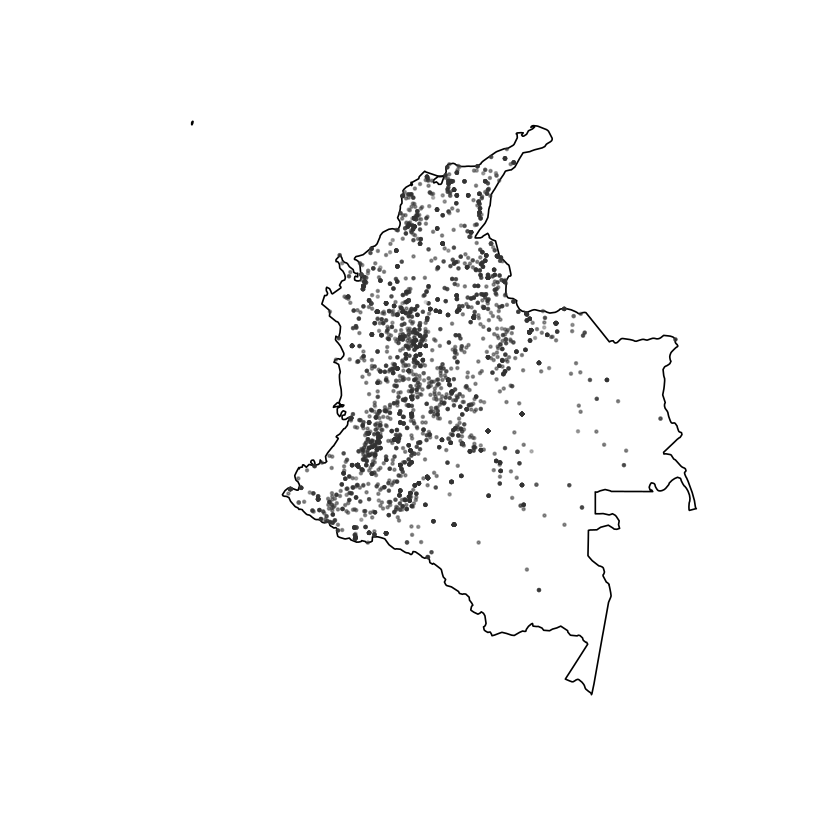

In [8]:
mypal <- function(n)gray.colors(n,start=.2,end=.9,alpha=.5)
plot(st_geometry(Colombia))
plot(Colombia.conflicts["deaths_civilians"],
     add=TRUE,pch=19,cex=.2,
     pal=mypal,
     nbreaks=30
     )

In [9]:
st_circ <- function(x,dist.km){
    dist.degr <- 360*dist.km/40007.863
    st_buffer(st_geometry(x),dist=dist.degr)
}

In [10]:
Bogota.200km <- st_circ(Bogota,dist.km=200)

Warning message in st_buffer.sfc(st_geometry(x), dist = dist.degr):
“st_buffer does not correctly buffer longitude/latitude data”
dist is assumed to be in decimal degrees (arc_degrees).



In [11]:
Bogota.conflicts <- ged191_ellips[Bogota.200km,]

although coordinates are longitude/latitude, st_intersects assumes that they are planar

although coordinates are longitude/latitude, st_intersects assumes that they are planar



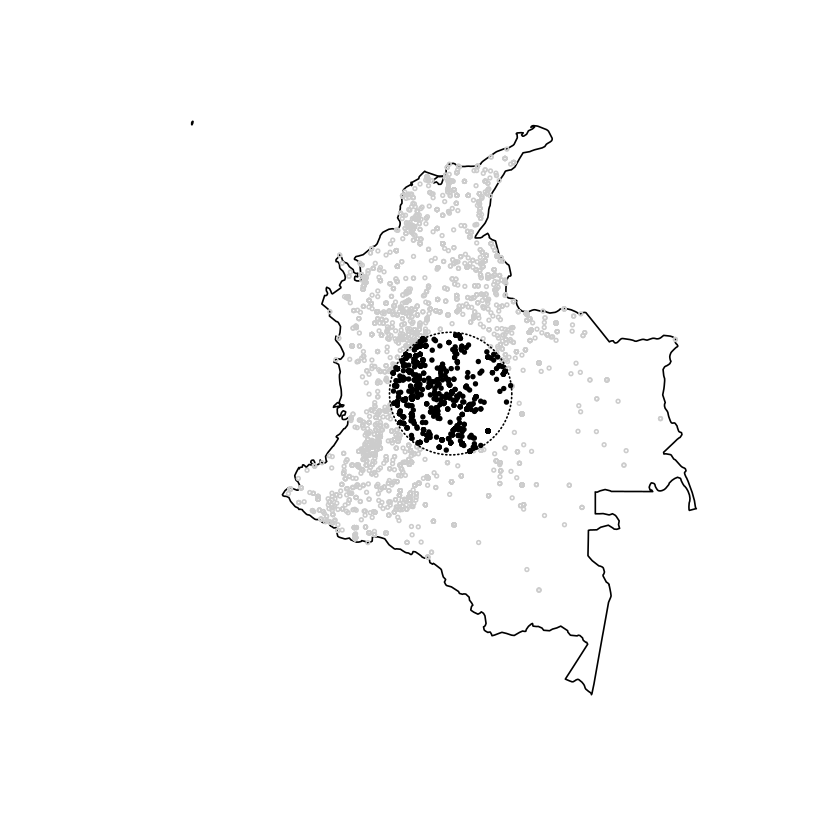

In [12]:
plot(st_geometry(Colombia))
plot(st_geometry(Colombia.conflicts),
     add=TRUE,pch=1,cex=.3,col="gray80"
     )
plot(st_geometry(Bogota.conflicts),
     add=TRUE,pch=19,cex=.3)
plot(Bogota.200km,lty=3,add=TRUE)